In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.table import Table
from astropy.timeseries import LombScargle
from astropy import time

In [2]:
lc_file_path = 'Output/Light_curve_001/4fgl_j0854.8+2006_lightcurve.fits'
emin = 0.1 *u.GeV
emax = 300 *u.GeV
D_l = 1588.6 *u.Mpc
hdul = fits.open('./' + lc_file_path)
lc = hdul[1].data

In [3]:
tmean = (lc['tmin_mjd'] + lc['tmax_mjd'])/2
flux = lc['flux']
flux_err = lc['flux_err']

In [4]:
max(lc['tmax_mjd']) - min(lc['tmin_mjd'])

2715.0

In [5]:
np.diff(lc['tmin_mjd'])

array([135.75, 135.75, 135.75, 135.75, 135.75, 135.75, 135.75, 135.75,
       135.75, 135.75, 135.75, 135.75, 135.75, 135.75, 135.75, 135.75,
       135.75, 135.75, 135.75])

In [6]:
np.diff(lc['tmax_mjd'])

array([135.75, 135.75, 135.75, 135.75, 135.75, 135.75, 135.75, 135.75,
       135.75, 135.75, 135.75, 135.75, 135.75, 135.75, 135.75, 135.75,
       135.75, 135.75, 135.75])

In [7]:
lc['tmax_mjd'].max() - lc['tmin_mjd'].min()

2715.0

In [8]:
np.diff(lc['tmax_mjd'] - lc['tmin_mjd'])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [9]:
lsp = LombScargle(tmean, flux, flux_err)
# min_freq = 1 / (max(lc['tmax_mjd']) - min(lc['tmin_mjd']))
min_freq = 0
# max_freq = 10 / (max(lc['tmax_mjd']) - min(lc['tmin_mjd']))
max_freq = 1 / np.diff(lc['tmin_mjd']).min()

min_freq /= u.d
max_freq /= u.d
frequency, power = lsp.autopower(minimum_frequency=0, maximum_frequency=max_freq.value)
power_max = np.nanmax(power)
best_freq = frequency[np.nanargmax(power)] / u.d
print('Best frequency: ', np.round(best_freq, 4))
print('Power max: ', np.round(power_max, 4))
print('FAP bootstrap: ', np.round(lsp.false_alarm_probability(power_max, method='bootstrap'), 2))
print('FAP baluev: ', np.round(lsp.false_alarm_probability(power_max, method='baluev'), 2))
print('FAP naive: ', np.round(lsp.false_alarm_probability(power_max, method='naive'), 2))
print('FAP davies: ', np.round(lsp.false_alarm_probability(power_max, method='davies'), 2))


Best frequency:  0.0059 1 / d
Power max:  0.4937
FAP bootstrap:  0.55
FAP baluev:  0.37
FAP naive:  0.14
FAP davies:  0.46


In [10]:
min_freq.to(1/u.yr)

<Quantity 0. 1 / yr>

In [11]:
max_freq.to(1/u.yr)

<Quantity 2.69060773 1 / yr>

In [12]:
best_freq.to(1/u.yr)

<Quantity 2.15248619 1 / yr>

In [13]:
(np.diff(frequency).mean() / u.d).to(1/u.yr)

<Quantity 0.02832219 1 / yr>

In [14]:
# fig, ax = plt.subplots(1, 1, )#figsize=(12, 8))

font = {'family': 'serif',
        'weight': 'bold',
        'size': 22,
        'color':  'black',
        }
smallerfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }

axesfont = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }

# ax.errorbar(tmean, flux, yerr=0.5*flux_err, fmt='o', c='b', elinewidth=0.24, capsize=2, label='Flux')

# # ax[1].errorbar(tmean, np.multiply(flux, avg_dists_2), yerr=np.multiply(0.5*(flux_err_up+flux_err_down), avg_dists_2), fmt='o', c='r', elinewidth=0.24, capsize=2, label='Flux $\\times$ D$\mathbf{^2}$')

# ax.set_ylabel('Flux ', fontdict=axesfont)


# # ax[1].set_ylabel('Flux $\\times$ D$\mathbf{^2}$\n [$\mathbf{10^6 AU^{2} cm^{-2} s^{-1}}$]', fontdict=axesfont)


# ax.yaxis.set_tick_params(labelsize=15)
# ax.legend(prop={'size':20, 'weight':'bold'})
    
# # ax.set_xticks([])ower at 1.5e-3:  0.4983123305824798
# ax.set_xlabel('Time [MJD]',  fontdict=axesfont)
# # ax.set_xticks(tmean[::100])
# ax.xaxis.set_tick_params(labelsize=14, rotation=36)
# plt.tight_layout()
# # plt.savefig('./outputs/timeseries_Super-K-original-data.pdf')
# plt.show()

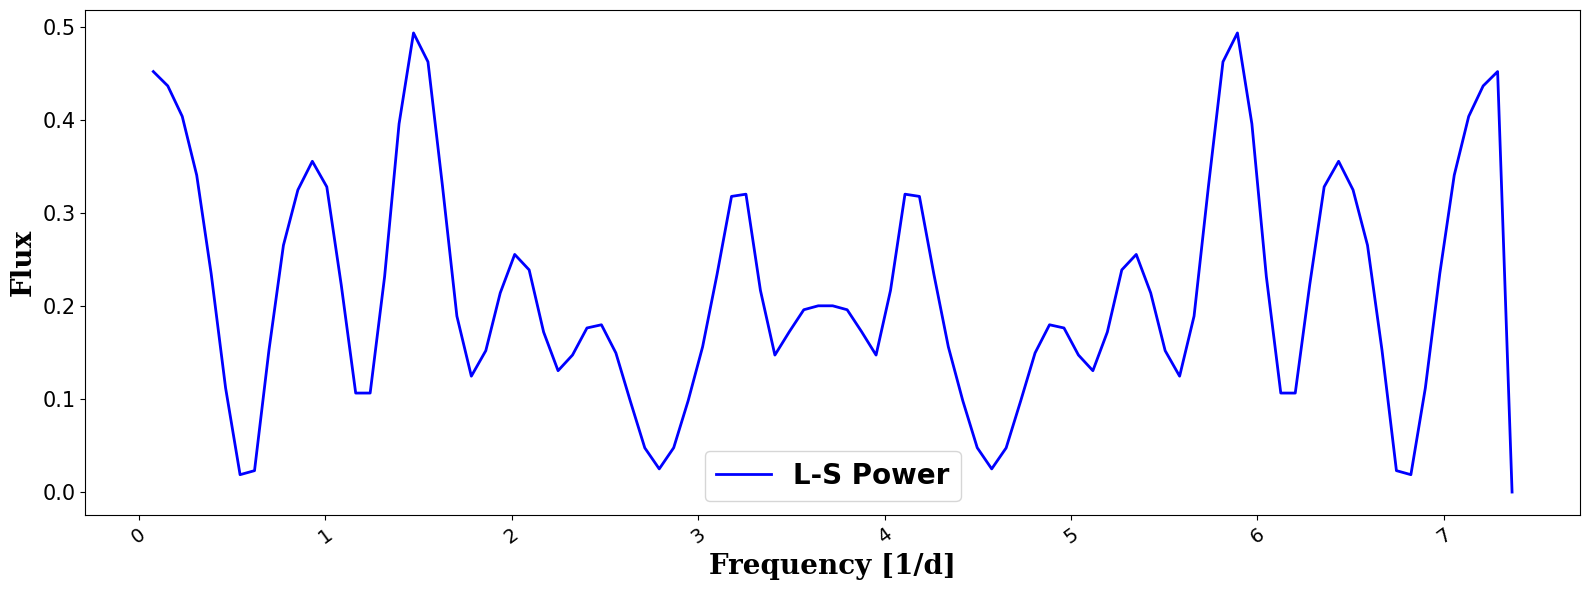

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 6))
# ax.errorbar(tmean, flux, yerr=0.5*flux_err, fmt='o', c='b', elinewidth=0.24, capsize=2, label='Flux')
ax.plot(frequency*1000, power, '-', lw=2, c='b', label='L-S Power')
# ax[1].errorbar(tmean, np.multiply(flux, avg_dists_2), yerr=np.multiply(0.5*(flux_err_up+flux_err_down), avg_dists_2), fmt='o', c='r', elinewidth=0.24, capsize=2, label='Flux $\\times$ D$\mathbf{^2}$')

# ax.set_ylabel('Flux [$\mathbf{10^6 cm^{-2} s^{-1}}$]', fontdict=axesfont)
ax.set_ylabel('Flux', fontdict=axesfont)


# ax[1].set_ylabel('Flux $\\times$ D$\mathbf{^2}$\n [$\mathbf{10^6 AU^{2} cm^{-2} s^{-1}}$]', fontdict=axesfont)


ax.yaxis.set_tick_params(labelsize=15)
ax.legend(prop={'size':20, 'weight':'bold'})
    
# ax.set_xticks([])
ax.set_xlabel('Frequency [1/d]',  fontdict=axesfont)
# ax.set_xticks(tmean[::100])
ax.xaxis.set_tick_params(labelsize=14, rotation=36)
plt.tight_layout()
# plt.savefig('./outputs/timeseries_Super-K-original-data.pdf')
plt.show()

In [16]:

print('Best frequency: ', best_freq)
print('Power at best frequency: ', power_max)
print('FAP Bootstrap: ', lsp.false_alarm_probability(power_max, method='bootstrap'))
print('FAP Davies: ', lsp.false_alarm_probability(power_max, method='davies'))
print('FAP baluev: ', lsp.false_alarm_probability(power_max, method='baluev'))
print('FAP naive: ', lsp.false_alarm_probability(power_max, method='naive'))

Best frequency:  0.0 1 / d
Power at best frequency:  0.4937017041757171
FAP Bootstrap:  0.538
FAP Davies:  0.4639355520959097
FAP baluev:  0.3711988953498389
FAP naive:  0.14286177423256602


In [17]:
power1_5 = lsp.power(0.0015)
print('Power at 1.5e-3: ', power1_5)
print('FAP bootstrap: ', lsp.false_alarm_probability(power1_5, method='bootstrap'))
print('FAP davies: ', lsp.false_alarm_probability(power1_5, method='davies'))
print('FAP baluev: ', lsp.false_alarm_probability(power1_5, method='baluev'))
print('FAP naive: ', lsp.false_alarm_probability(power1_5, method='naive'))

Power at 1.5e-3:  0.4983123305824798
FAP bootstrap:  0.5329999999999999
FAP davies:  0.43317705938474405
FAP baluev:  0.3515569561805789
FAP naive:  0.13290493411126159
